## Data preparation
Read ActiveSG gym JSON data and transform into structured tabular dataframe and store it into [csv data](gym-data.csv).

The data source can be found at http://gym-tracker.data.gov.sg/ with attributes including gym location, week day(Mon, Tue, ..., Sun), occupancy rate (0 to 1) for every 1 hour period.

In [1]:
import json
import pandas as pd

def extract_data():
    #################
    # Read json data
    #################
    with open('gym-formatted-data.json') as data_file:    
        gym_data = json.load(data_file)
    
    ##################
    # Create columns
    #################
    location = []
    day = []
    for n in range(0, 2400, 100):
       exec('occupy_' + str(n).zfill(4) + ' = []')
    
    ########################################
    # Scan all the data throughout the JSON
    ########################################
    week_days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    for key, value in gym_data.items():
        weekly_data = value['weekly_data']
        for day_index, day_data in enumerate(weekly_data):
            location.append(key)
            day.append(week_days[day_index])
            for hour_index, hour_data in enumerate(day_data):
                exec('occupy_' + str(hour_index * 100).zfill(4) + '.append(' + str(hour_data/100) + ')')
    
    #####################
    # Create DataFrame
    ####################
    dict_gym = {}
    dict_gym['day'] = day
    dict_gym['location'] = location
    for n in range(0, 2400, 100):
        var_name = 'occupy_' + str(n).zfill(4)
        dict_gym[var_name] = locals()[var_name]
    df = pd.DataFrame.from_dict(dict_gym)
    
    ########################
    # Save dataframe to CSV
    ########################
    df.to_csv('gym-data.csv', index=False)
    print('The csv "gym-data.csv" has been generated successfully.')
    
extract_data()

The csv "gym-data.csv" has been generated successfully.


## Create features and target data
The objective is to predict the the occupancy rate at 7.00pm.

In [2]:
def get_gym_data(source, target):
    df = pd.read_csv(source)
    X = pd.get_dummies(df.drop([target], axis=1)) # One hot encoding
    y = df[target]
    return X, y

X, y = get_gym_data(source="gym-data.csv", target='occupy_1900')

In [3]:
# Print all features
print(X.columns)

Index(['occupy_0000', 'occupy_0100', 'occupy_0200', 'occupy_0300',
       'occupy_0400', 'occupy_0500', 'occupy_0600', 'occupy_0700',
       'occupy_0800', 'occupy_0900', 'occupy_1000', 'occupy_1100',
       'occupy_1200', 'occupy_1300', 'occupy_1400', 'occupy_1500',
       'occupy_1600', 'occupy_1700', 'occupy_1800', 'occupy_2000',
       'occupy_2100', 'occupy_2200', 'occupy_2300', 'day_fri', 'day_mon',
       'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed',
       'location_average_gym', 'location_bedok', 'location_bishan',
       'location_bukit_gombak', 'location_cck', 'location_clementi',
       'location_delta', 'location_hougang', 'location_jurong_east',
       'location_jurong_west', 'location_pasir_ris', 'location_sengkang',
       'location_tampines', 'location_toa_payoh', 'location_woodlands',
       'location_yck', 'location_yishun'],
      dtype='object')


In [4]:
# Print top 5 data
X.head()

,occupy_0000,occupy_0100,occupy_0200,occupy_0300,occupy_0400,occupy_0500,occupy_0600,occupy_0700,occupy_0800,occupy_0900,...,location_hougang,location_jurong_east,location_jurong_west,location_pasir_ris,location_sengkang,location_tampines,location_toa_payoh,location_woodlands,location_yck,location_yishun
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205,0.290,0.300,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.310,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190,0.270,0.335,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.290,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180,0.215,0.300,...,0,0,0,1,0,0,0,0,0,0


In [5]:
# Display basic statistics of numeric features
X.describe()

,occupy_0000,occupy_0100,occupy_0200,occupy_0300,occupy_0400,occupy_0500,occupy_0600,occupy_0700,occupy_0800,occupy_0900,...,location_hougang,location_jurong_east,location_jurong_west,location_pasir_ris,location_sengkang,location_tampines,location_toa_payoh,location_woodlands,location_yck,location_yishun
count,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076439,0.114590,0.327601,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097589,0.144806,0.103334,...,0.236289,0.236289,0.236289,0.236289,0.236289,0.236289,0.236289,0.236289,0.236289,0.236289
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.153300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.247750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.323050,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157600,0.241275,0.390850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305900,0.494100,0.658800,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Modelling
Here we will do regression to estimate the occupancy rate at 7pm using algorithms
1. [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. [Support Vector Regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
3. [K Neighbors Regression](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

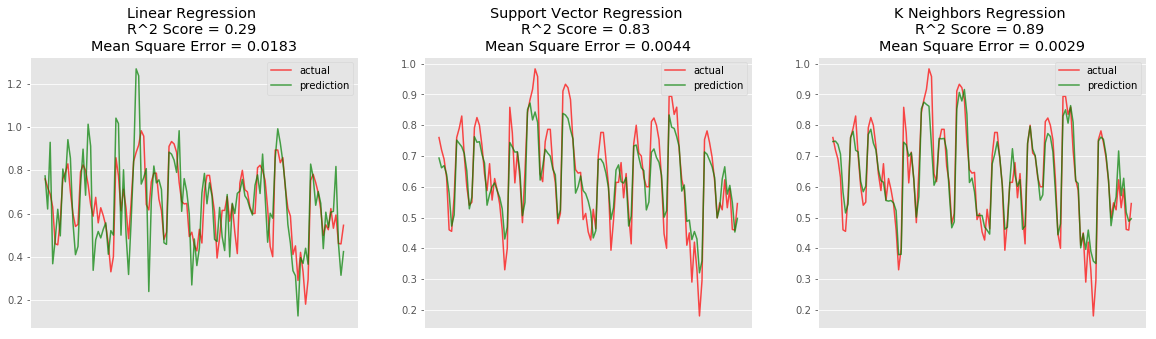

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_model(X, y, regressors, descriptions):
    ##########################
    # Define figure dimension
    ###########################
    fig = plt.figure(figsize=(20,5))
    
    for i in range(3):
        #####################
        # Fit training model
        #####################
        model = regressors[i]()
        model.fit(X, y)
        prediction = model.predict(X)
        
        ######################################
        # Create subplot: Actual vs Prediction
        #######################################
        ax = fig.add_subplot(1, 3, i+1)
        x = range(0, len(y))
        ax.plot(x, y, 'r', alpha=0.7, label='actual')
        ax.plot(x, prediction, 'g', alpha=0.7, label='prediction')
        ax.set_xticks([])
        
        #####################################
        # Add performance metrics into title
        #####################################
        r2 = '{0:.2f}'.format(r2_score(y, prediction))
        mse = '{0:.4f}'.format(mean_squared_error(y, prediction))
        ax.set_title(f'{descriptions[i]} \n'
                      f'R^2 Score = {r2} \n'
                      f'Mean Square Error = {mse}')
        ax.legend()
    plt.show()
    
regressors = [LinearRegression, SVR, KNeighborsRegressor]
descriptions = ['Linear Regression', 'Support Vector Regression', 'K Neighbors Regression']
plot_model(X, y, regressors, descriptions)

## Scree Plot
Here we apply scree test criterion to find the maximum number of principal components from PCA by looking at first large drop, followed by plateau in graph. 

According to the graph, we should take only maximum first 4 principal components.

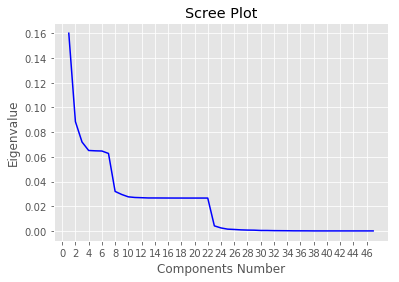

In [7]:
import numpy as np
from sklearn.decomposition import PCA

def plot_pca_variances():
    #################################
    # Calculated PCA variance ratios
    #################################
    pca = PCA()
    pca.fit(X)
    variances = pca.explained_variance_ratio_
    x = range(1, len(variances)+1,1)
    
    ###################
    # Create barcharts
    ###################
    plt.plot(x, variances, color='b')
    plt.title('Scree Plot')
    plt.xlabel('Components Number')
    plt.ylabel('Eigenvalue')
    plt.xticks(range(0,len(variances)+1,2))
    plt.show()

plot_pca_variances()

## Model Evaluation after dimensional reduction
Evaluate 3 models based on 2 metrices: R square & Mean Square Error scores. The graph shows significant good performance when 4 four components are picked for the machine learning.

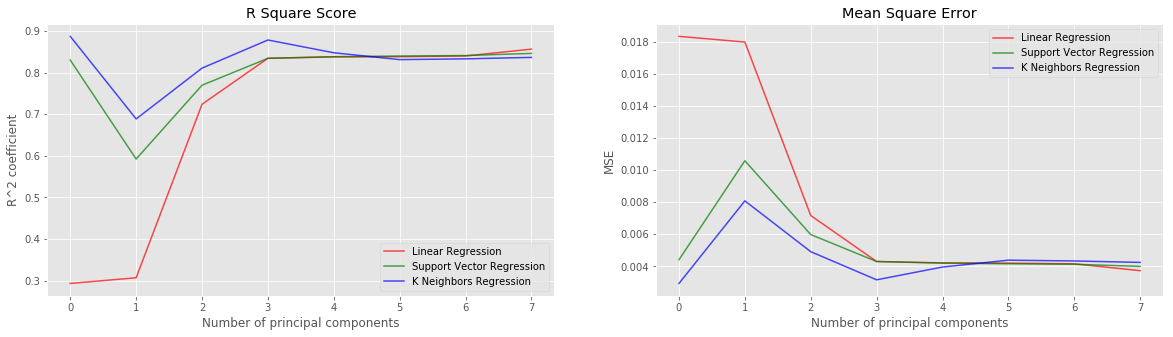

In [8]:
def plot_scores(X, y, regressors, descriptions, n_components):
    results_r2 = [[], [], []]
    results_mse = [[], [], []]
    for n in range(0, n_components):
        #########################
        # Apply PCA technique
        #########################
        if n > 0:
            pca = PCA(n_components=n)
            pca.fit(X)
            X_transformed, y = pca.transform(X), y
        else:
            X_transformed = X
        
        ##############################
        # Calculate performance score
        #############################
        for i in range(3):
            model = regressors[i]()
            model.fit(X_transformed, y)
            prediction = model.predict(X_transformed)
            results_r2[i].append(r2_score(y, prediction))
            results_mse[i].append(mean_squared_error(y, prediction))
    
    ####################################################
    # Plot all scores of each regressor on same graph
    ####################################################
    fig = plt.figure(figsize=(20,5))
    x = range(n_components)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x, results_r2[0], 'r', alpha=0.7, label=descriptions[0])
    ax.plot(x, results_r2[1], 'g', alpha=0.7, label=descriptions[1])
    ax.plot(x, results_r2[2], 'b', alpha=0.7, label=descriptions[2])
    ax.legend()
    ax.set_xlabel('Number of principal components')
    ax.set_ylabel('R^2 coefficient')
    ax.set_title('R Square Score')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x, results_mse[0], 'r', alpha=0.7, label=descriptions[0])
    ax.plot(x, results_mse[1], 'g', alpha=0.7, label=descriptions[1])
    ax.plot(x, results_mse[2], 'b', alpha=0.7, label=descriptions[2])
    ax.legend()
    ax.set_xlabel('Number of principal components')
    ax.set_ylabel('MSE')
    ax.set_title('Mean Square Error')
    
    plt.show()
            
plot_scores(X, y, regressors, descriptions, 8)

Without principal component analysis.


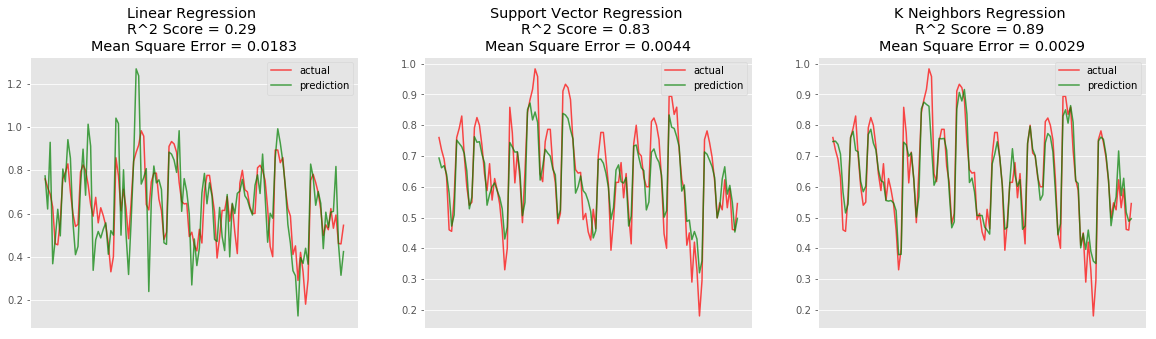

Number of principal components = 1 



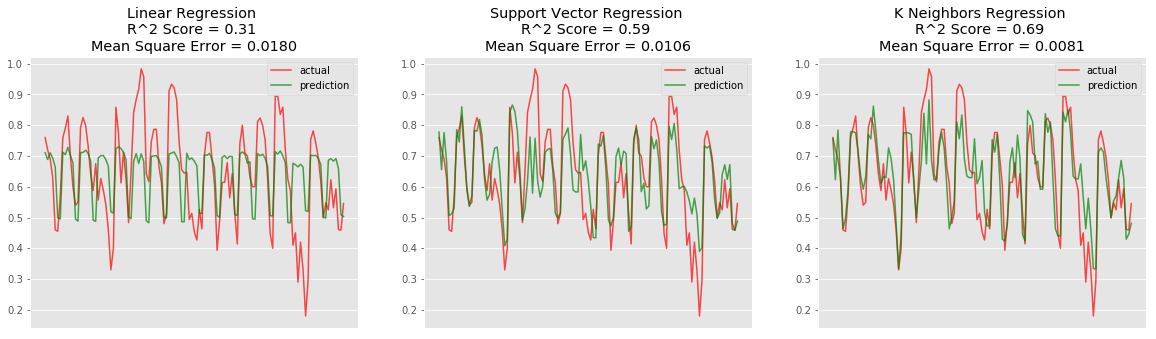

Number of principal components = 2 



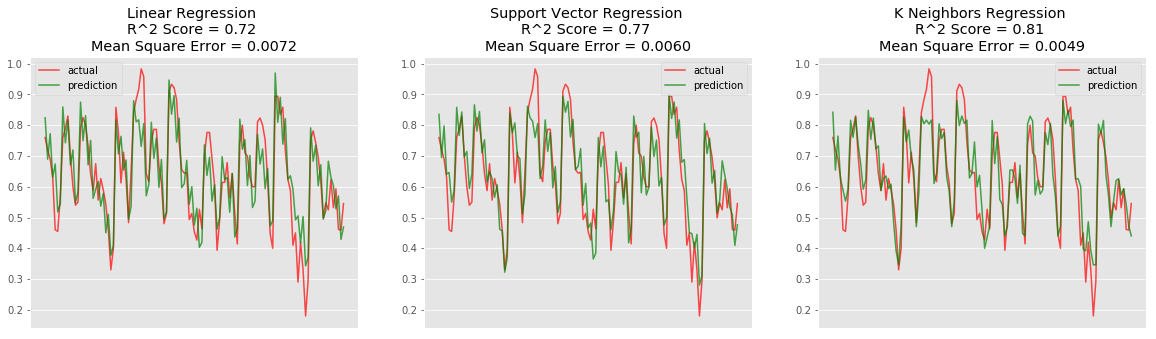

Number of principal components = 3 



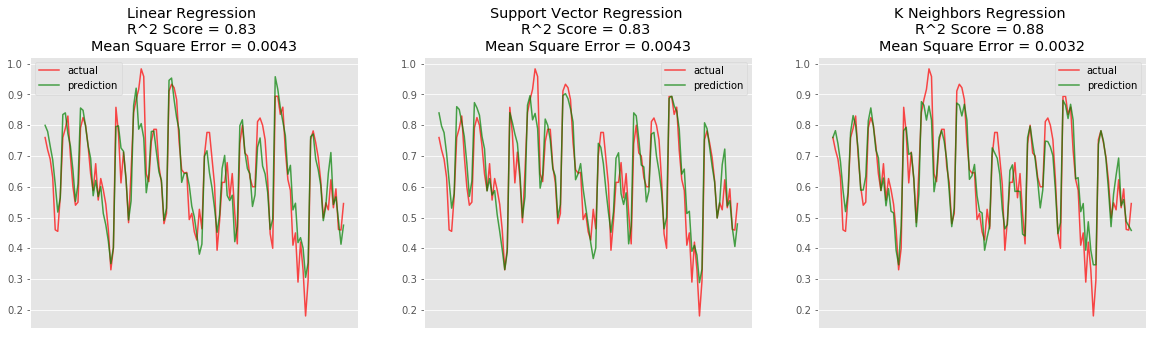

Number of principal components = 4 



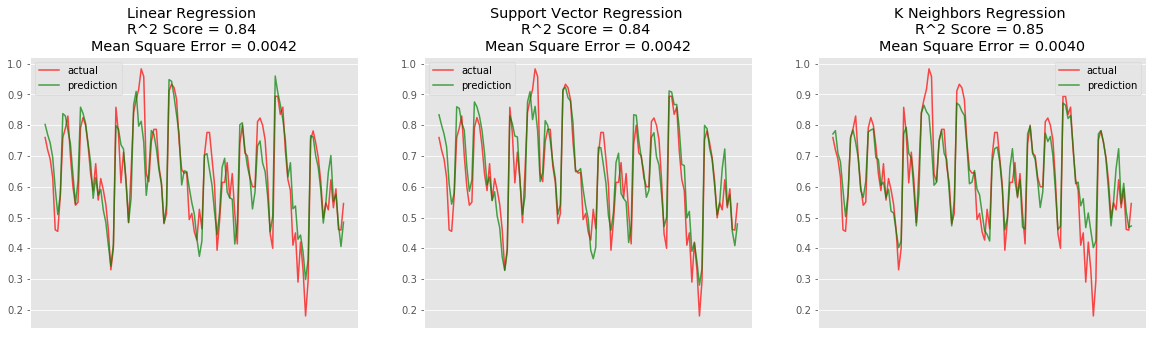

In [9]:
def plot_model_with_pca(X, y, regressors, descriptions, n_components):
    ###################################
    # Plot model as usual without PCA
    ##################################
    if n == 0:
        print(f'Without principal component analysis.')
        plot_model(X, y, regressors, descriptions)
        return

    ###########################################
    # Get n components using PCA
    # Fit transform the originl feature dataset
    ############################################
    pca = PCA(n_components=n)
    pca.fit(X)
    X_pca, y = pca.transform(X), y
    
    ###############################################
    # Plot actual vs prediction for each regressor
    ###############################################
    print(f'Number of principal components = {n} \n')
    plot_model(X_pca, y, regressors, descriptions)

########################
# Plot models for
#  - No PCA
#  - PCA with n = 1 to 6
#########################
for n in range(5):
    plot_model_with_pca(X, y, regressors, descriptions, n)

##  Visualize component coefficients
Display linear combination of original features for first 4 principal component.

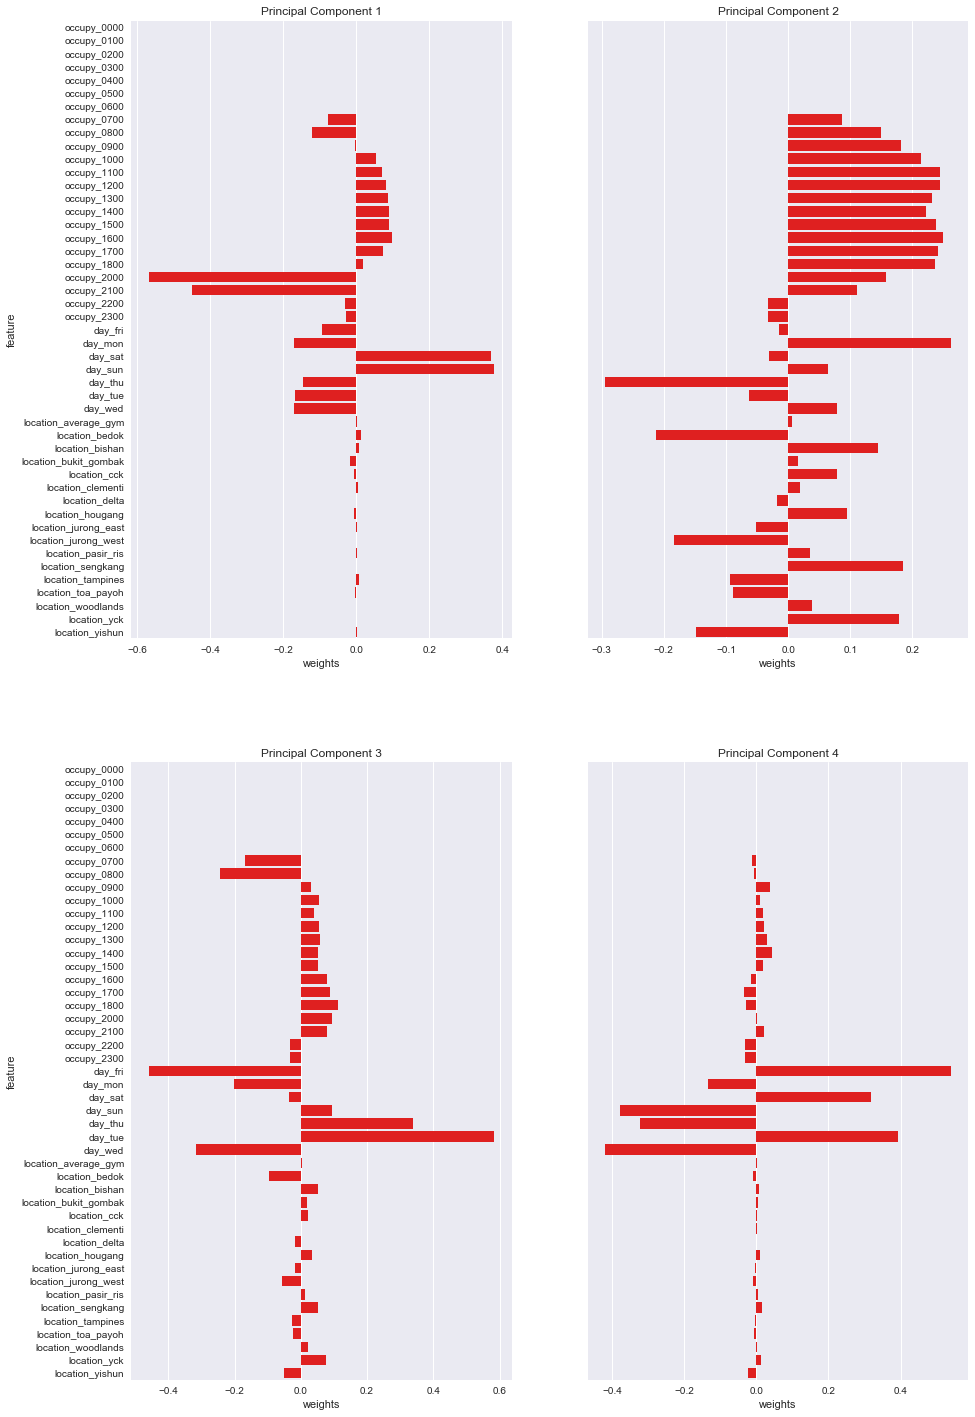

In [10]:
import seaborn as sns

def plot_pca_comparison(features):
    ##################
    # Create dataframe
    ##################
    pca = PCA(n_components=4)
    pca.fit(features)
    feature_weights = pd.DataFrame.from_dict({
        'feature': features.columns,
        'principal_1': pca.components_.T[:, 0],
        'principal_2': pca.components_.T[:, 1],
        'principal_3': pca.components_.T[:, 2],
        'principal_4': pca.components_.T[:, 3]
    })

    #############################################
    # Plot all principal components with weights
    #############################################
    fig = plt.figure(figsize=(15,25))
    for n in range(1, 5):
        ax = fig.add_subplot(2, 2, n)
        sns.barplot(x=f'principal_{n}', y='feature', data=feature_weights, color="r")
        ax.set_title(f'Principal Component {n}')
        ax.set_xlabel('weights')
        if n in [2, 4]:
            ax.set_yticks([])
            ax.set_ylabel('')
    plt.show()

plot_pca_comparison(X)

## Interpretion of each principal components

* Component 1 = Rountine of weekend workout at night 8pm to 10pm.
* Component 2 = Rountine of 2 workout days per week (Mon & Thu) before lunchtime and dinner time.
* Component 3 = Routine of morning workout everyday but take rest on long weekend including Monday.
* Component 4 = Routine of daily workout and only rest on Monday.

In [11]:
def intepret_components(cutoff):
    pca = PCA(n_components=4)
    pca.fit(X)
    for n in range(4):
        indexes = np.argwhere(np.absolute(pca.components_[n]) >= cutoff)
        selected_fields = np.array(X.columns[indexes]).flatten()
        selected_fields.sort()
        representatives = ', '.join(selected_fields)
        print(f'Principal Component {n+1} has significances {{{representatives}}}')
        
intepret_components(0.24)

Principal Component 1 has significances {day_sat, day_sun, occupy_2000, occupy_2100}
Principal Component 2 has significances {day_mon, day_thu, occupy_1100, occupy_1200, occupy_1600, occupy_1700}
Principal Component 3 has significances {day_fri, day_thu, day_tue, day_wed, occupy_0800}
Principal Component 4 has significances {day_fri, day_sat, day_sun, day_thu, day_tue, day_wed}


## Cluster Analysis
Perform different clustering techniques and display scatter matrix to demonstrate correlation between principal components:
* [K Means Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* [Agglomerative Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [12]:
def get_full_gym_data(source):
    df = pd.get_dummies(pd.read_csv(source))
    return PCA(n_components=4).fit_transform(df)

def plot_scatter_matrix_for_clustering(data, cluster, n_clusters):
    plt.style.use('classic')
    
    labels = cluster(n_clusters=n_clusters).fit_predict(data)
    df = pd.DataFrame(data, columns=['P1','P2','P3','P4'])
    pd.plotting.scatter_matrix(df, c=labels, figsize=[8, 8], s=20, marker='D')
    
    plt.show()
    
pca_data = get_full_gym_data(source="gym-data.csv")

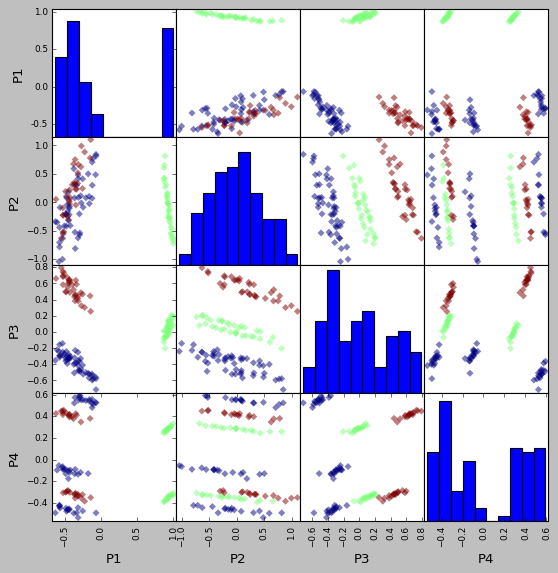

In [13]:
# K means clustering
import random
from sklearn.cluster import KMeans

random.seed(42)
plot_scatter_matrix_for_clustering(pca_data, KMeans, 3)

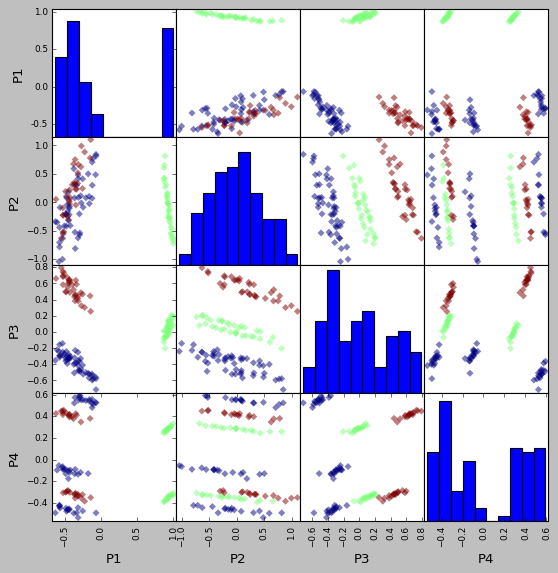

In [14]:
# Agglomerative Clustering (Hierachical)
from sklearn.cluster import AgglomerativeClustering

plot_scatter_matrix_for_clustering(pca_data, AgglomerativeClustering, 3)

## Interpret cluster profiles
Since above 2 clustering algorithms produce very similar results, we will just discuss the scatter matrix of agglomerative clustering.

By looking at cluster pairs (P1, P2), (P1, P3) and (P1, P4), we can easily conclude that

* Cluster 1 = Records with high P1.

Next we check (P4, P1), (P4, P2) and (P4, P3), there is no significance isolation on any cluster on the distribution of points.  
The only left cluster pair is (P2, P3), all clusters show the positive diagonal trend and the another 2 clusters located above and bottom in the graph which tells:

* Cluster 2 = Records with low P1 and P3 > P2.
* Cluster 3 = Records with low P1 and P3 < P2.

Let's rephrase the customer profiles with meaningful description using the definition of each components:

* Cluster 1 = People who prefers night workout only on weekend.
* Cluster 2 = People who prefers morning workout everyday but rest on long weekend including Monday.
* Cluster 3 = People who prefers before dinner and lunch workout only on Monday and Thursday.

In [15]:
labels = AgglomerativeClustering(n_clusters=3).fit_predict(pca_data)
cluster_pca_data = np.column_stack((pca_data,labels))
df = pd.DataFrame(cluster_pca_data, columns=['P1','P2','P3','P4','Cluster'])
df['Cluster'] = df['Cluster'].astype(int)
df.groupby(['Cluster']).mean()

,P1,P2,P3,P4
Cluster,,,,
0,-0.358987,-0.081940,-0.386176,-0.008821
1,0.932640,-0.073506,0.041105,-0.031623
2,-0.394160,0.196415,0.538159,0.044854


In [16]:
# Remap cluster indexes to fit our conclusion
# 1 -> 1, 2 -> 2, 0 -> 3
df['Cluster']=df['Cluster'].map({1:1, 2:2, 0:3})
new_labels = df['Cluster']
df.groupby(['Cluster']).mean()

,P1,P2,P3,P4
Cluster,,,,
1,0.932640,-0.073506,0.041105,-0.031623
2,-0.394160,0.196415,0.538159,0.044854
3,-0.358987,-0.081940,-0.386176,-0.008821


## Save cluster profiles
Add cluster labels to original dataset and save as [csv data](gym-data-cluster.csv).

In [17]:
df = pd.read_csv('gym-data.csv')
df['cluster']=new_labels
df.to_csv('gym-data-cluster.csv', index=False)
print('The csv "gym-data-cluster.csv" has been generated successfully.')

The csv "gym-data-cluster.csv" has been generated successfully.
